In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import seaborn as sns
import re

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#1-1 read Data
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv" #Datasett
df = pd.read_csv(url, sep=';') # For å lese datasett
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
#Converting Dato to datetime:
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
#For å få kun buss 150:
df=df[df['Linjenavn']=='150']

In [4]:
df['Passasjerer_Ombord']= df['Passasjerer_Ombord'].abs() #Var negative passasjerer, eks. -5

In [ ]:

df_ny=df[['Dato','Passasjerer_Ombord']].copy()
df_ny

In [6]:
df_ny['Ukedag']=df_ny['Dato'].dt.dayofweek

In [7]:
df_ny=df_ny[['Dato','Ukedag','Passasjerer_Ombord']]
df_ny.head()

,Dato,Ukedag,Passasjerer_Ombord
0,2020-10-08,3,5
1,2020-08-15,5,5
2,2020-03-08,6,6
3,2020-07-27,0,10
4,2020-08-27,3,10


In [8]:
df_ny['Dato']=df_ny['Dato'].map(dt.datetime.toordinal)
df_ny.head()

,Dato,Ukedag,Passasjerer_Ombord
0,737706,3,5
1,737652,5,5
2,737492,6,6
3,737633,0,10
4,737664,3,10


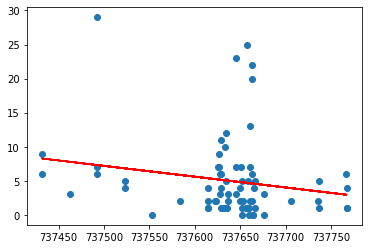

MSE = 34.20286651736647


In [9]:
#Let's train a model
#First let's split the set in a training and a testing set:
X = pd.DataFrame(df_ny['Dato']) #Var1
y = pd.DataFrame(df_ny['Passasjerer_Ombord']) #Result

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



#Now have 2/3 of the values in Var1 stored in X_train and 1/3 stored in X_test.
#You can now create a linear regressor model:
predict_dato = LinearRegression()  # create object for the class
predict_dato.fit(X_train, y_train)  # perform linear regression
Y_pred = predict_dato.predict(X_train)  # make predictions


#To see the result, you can plot the prediction against the result column:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

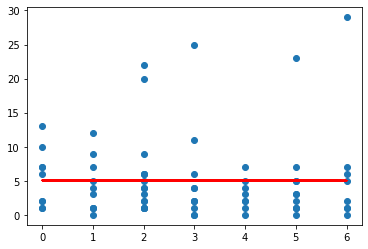

MSE = 35.35433544459174


In [10]:
#Let's train a model
#First let's split the set in a training and a testing set:
X = pd.DataFrame(df_ny['Ukedag']) #Var1
y = pd.DataFrame(df_ny['Passasjerer_Ombord']) #Result

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



#Now have 2/3 of the values in Var1 stored in X_train and 1/3 stored in X_test.
#You can now create a linear regressor model:
predict_ukedag= LinearRegression()  # create object for the class
predict_ukedag.fit(X_train, y_train)  # perform linear regression
Y_pred = predict_ukedag.predict(X_train)  # make predictions


#To see the result, you can plot the prediction against the result column:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

In [ ]:
dato = input("Tast inn dato dd.mm.yyyy: ")
dato = dato.split(".")
d=dt.date(int(dato[2]), int(dato[1]), int(dato[0]))
x = d.weekday()
predict_ukedag.predict([[x]])
#Bruker predict_ukedag siden den var mer nøyaktiv, og vil slipper da å få negative tall.